In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

In [10]:
steam_db = pd.read_csv('new_steam_db1_.csv')

In [11]:
steam_db.head()

,record_id,App Id,Name,Developers,Publishers,Metascores,Owners,Genres
0,153,220,Half-Life 2,Valve,Valve,0.96,1.000000e+10,['Action']
1,333,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,0.96,2.000000e+07,"['Action', 'Adventure']"
2,869,70,Half-Life,Valve,Valve,0.96,5.000000e+06,['Action']
3,904,7670,BioShock,2K Boston,2K,0.96,2.000000e+06,"['Action', 'RPG']"
4,812,620,Portal 2,Valve,Valve,0.95,1.000000e+10,"['Action', 'Adventure']"


In [12]:
steam_db["Genres"] = steam_db["Genres"].apply(eval)


In [13]:
steam_db['Genres'].dtypes


dtype('O')

In [14]:
genre_dict = {}
for i in steam_db["Genres"]:
    for j in i:
        if j not in genre_dict:
            genre_dict[j] = 1
        else:
            genre_dict[j] += 1

In [15]:
print(genre_dict)

{'Action': 609, 'Adventure': 360, 'RPG': 242, 'Indie': 430, 'Strategy': 197, '': 6, 'in Early Access': 116, 'Free to Play': 145, 'Simulation': 208, 'Casual': 118, 'Massively Multiplayer': 91, 'Racing': 38, 'Sports': 45, 'Early Access': 60, 'Sexual Content': 1, 'Nudity': 1}


In [16]:
dev_pub_dummy = pd.get_dummies(steam_db, columns = ["Developers", "Publishers"])

In [17]:
genre_explode = steam_db.explode("Genres")

In [18]:
genre_explode

,record_id,App Id,Name,Developers,Publishers,Metascores,Owners,Genres
0,153,220,Half-Life 2,Valve,Valve,0.96,1.000000e+10,Action
1,333,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,0.96,2.000000e+07,Action
1,333,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,0.96,2.000000e+07,Adventure
2,869,70,Half-Life,Valve,Valve,0.96,5.000000e+06,Action
3,904,7670,BioShock,2K Boston,2K,0.96,2.000000e+06,Action
...,...,...,...,...,...,...,...,...
997,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,2.000000e+05,Action
997,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,2.000000e+05,Adventure
998,997,998940,The Invisible Guardian,New One Studio,New One Studio,0.00,0.000000e+00,Adventure
998,997,998940,The Invisible Guardian,New One Studio,New One Studio,0.00,0.000000e+00,Indie


In [11]:
dummy_genre = pd.get_dummies(genre_explode, columns = ["Developers", "Publishers","Genres"]).groupby("Name").max()

In [12]:
dummy_genre

,record_id,App Id,Metascores,Owners,Developers_10 Chambers Collective,Developers_1047 Games,Developers_11 bit studios,Developers_1939 Games,Developers_2K Australia,Developers_2K Boston,...,Genres_Indie,Genres_Massively Multiplayer,Genres_Nudity,Genres_RPG,Genres_Racing,Genres_Sexual Content,Genres_Simulation,Genres_Sports,Genres_Strategy,Genres_in Early Access
Name,,,,,,,,,,,,,,,,,,,,,
Sands of Salzaar,23,1094520,0.00,500000.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
100% Orange Juice,350,282800,0.00,500000.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
60 Seconds!,513,368360,0.00,500000.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
7 Days to Die,286,251570,0.00,2000000.0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
911 Operator,720,503560,0.68,500000.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eFootball PES 2020,995,996470,0.00,500000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
missed messages.,919,812810,0.00,200000.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
tModLoader,62,1281930,0.00,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


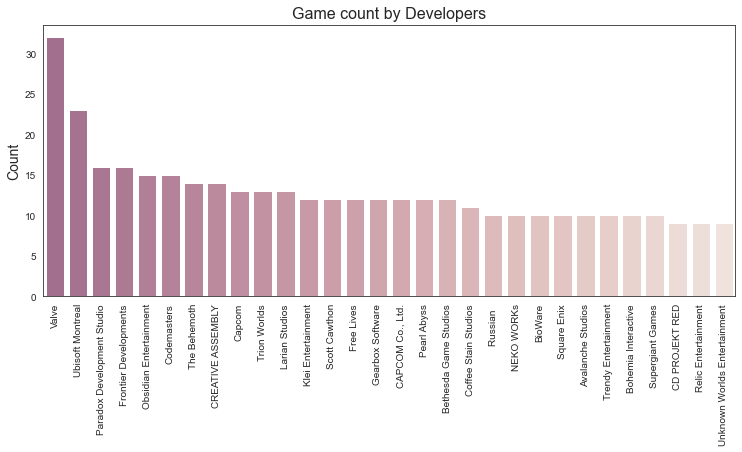

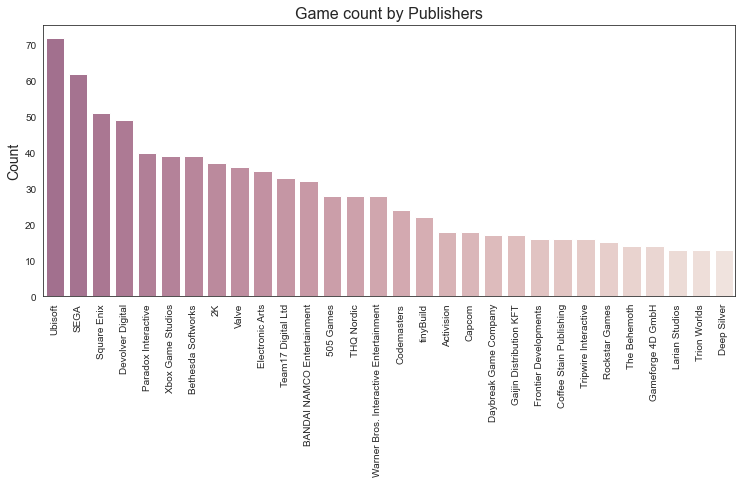

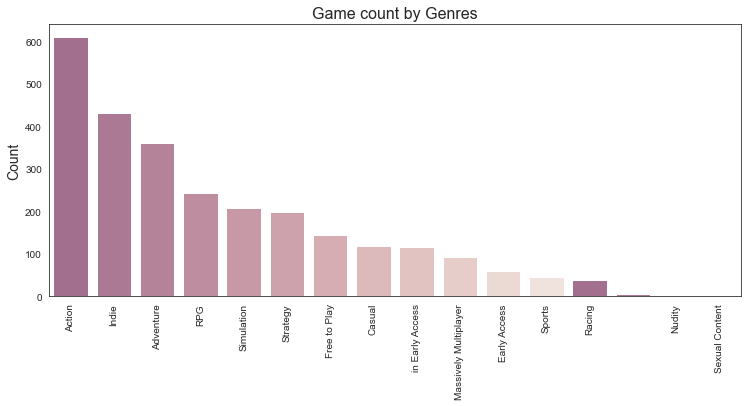

In [13]:
cols = ['Developers', 'Publishers', 'Genres']

for col in cols:
    chart = genre_explode[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genres' else 30), dark=0.5, light=.90, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [14]:
import sys
sys.maxsize

2147483647

In [15]:
genre_explode["Owners"] = pd.to_numeric(genre_explode["Owners"], downcast="float")

In [16]:
genre_explode['Owners'] = genre_explode['Owners'].astype(int)


In [17]:
#define popular vs. unpopular based off of game ownership
own_med = genre_explode["Owners"].median()
own_med
own_max = genre_explode["Owners"].max()
own_max
own_med

1000000.0

In [18]:
genre_explode['Owners'].dtypes

dtype('int32')

In [19]:
X = genre_explode["Metascores"].values.reshape(-1, 1)
y = genre_explode["Owners"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2667, 1) (2667, 1)


Text(0, 0.5, 'Number of Owners')

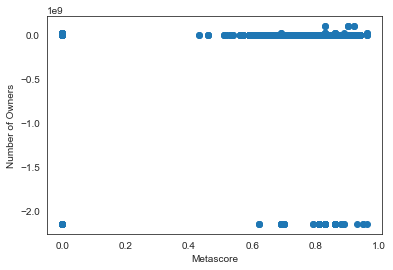

In [20]:
plt.scatter(X, y)
plt.xlabel("Metascore")
plt.ylabel("Number of Owners")

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [23]:
model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 1.0181842653905344e+17
R-squared (R2 ): -0.0025986188298914303


In [25]:
model.score(X_test, y_test)

-0.0025986188298914303

In [26]:
popular = genre_explode.loc[genre_explode["Owners"]>=own_med]


In [38]:


# if number of owners is greater than owner median = hit
#else: not a bloody hit


genre_explode.loc[genre_explode["Owners"]>= own_med, "Hit"] = 1
genre_explode.loc[genre_explode["Owners"]< own_med, "Hit"] = 0


In [40]:
genre_explode[genre_explode["Hit"] == 0]

,record_id,App Id,Name,Developers,Publishers,Metascores,Owners,Genres,Hit
11,959,900883,The Elder Scrolls IV: Oblivion Game of the Yea...,Bethesda Game Studios,Bethesda Softworks,0.94,0.0,,0.0
24,43,1158310,Crusader Kings III,Paradox Development Studio,Paradox Interactive,0.91,500000.0,RPG,0.0
24,43,1158310,Crusader Kings III,Paradox Development Studio,Paradox Interactive,0.91,500000.0,Simulation,0.0
24,43,1158310,Crusader Kings III,Paradox Development Studio,Paradox Interactive,0.91,500000.0,Strategy,0.0
26,74,17450,Dragon Age: Origins,BioWare,Electronic Arts,0.91,500000.0,RPG,0.0
...,...,...,...,...,...,...,...,...,...
997,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,200000.0,Action,0.0
997,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,200000.0,Adventure,0.0
998,997,998940,The Invisible Guardian,New One Studio,New One Studio,0.00,0.0,Adventure,0.0
998,997,998940,The Invisible Guardian,New One Studio,New One Studio,0.00,0.0,Indie,0.0
